<a href="https://colab.research.google.com/github/Midorinoha/Midorinoha/blob/main/Logistic_regression_based_on_Pulsar_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Была использована база ** *pulsar_stars* **с ограничением:**
**TARGET** = 0 & **MIP**[90.6640625, 95.2890625] и 
**TARGET** = 1 & **MIP**[60.078125, 75.7421875]

Количество строк в базе 924

In [ ]:
#Подключение необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Загрузим данные по звездам
p_star = pd.read_csv("/content/sample_data/report_1000.csv", delimiter=',', 
                         #index_col='id'
                         )

In [ ]:
#Посмотрим на данные
p_star.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
0,93.773438,41.883062,0.371402,1.291232,1.482441,12.959050,12.242911,180.158844,0
1,93.429688,39.883166,0.602060,1.518548,2.475753,14.146578,8.770640,107.970173,0
2,67.664062,32.561787,2.028000,8.098344,8.266722,34.838902,4.793382,24.032048,1
3,94.335938,43.194198,0.515280,0.862444,4.530100,23.187543,6.375537,45.401095,0
4,60.632812,47.564737,2.401281,5.858265,93.586957,89.542258,0.383887,-1.319026,1


In [ ]:
p_star['TARGET'].value_counts()

0    667
1    257
Name: TARGET, dtype: int64

Получилось в нашей выборке 257 пульсаров. Остальные звезды не пульсары

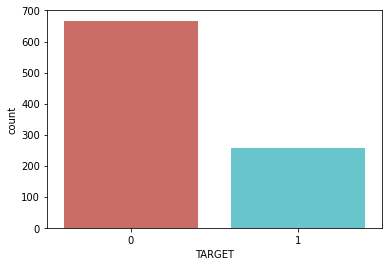

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='TARGET', data=p_star, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
#Среднее значение MIP
print('Среднее значение MIP: ', round(p_star.MIP.mean(),3))

Среднее значение MIP:  85.96


In [ ]:
#Среднее по всем столбцам по группировке TARGET
p_star.groupby('TARGET').mean()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
TARGET,,,,,,,,
0,93.093012,42.284223,0.562372,1.319220,5.866256,20.481345,9.697021,130.543264
1,67.447288,39.771364,2.197243,7.769428,29.404386,51.925248,3.427941,19.836644


In [ ]:
#Статистика по базе
p_star.describe()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,85.959948,41.585300,1.017093,3.113271,12.413117,29.227106,7.953348,99.751488,0.278139
std,11.794327,6.144264,0.786739,3.484005,25.299095,20.537785,4.802065,115.234853,0.448325
min,60.085938,29.168706,0.085352,-1.040048,0.372074,7.658623,-2.269474,-1.836731,0.000000
25%,74.115234,37.051905,0.494058,0.854031,1.940008,14.839031,4.225576,17.377634,0.000000
50%,92.218750,41.049715,0.636526,1.621364,3.016304,19.593758,8.029208,73.500865,0.000000
75%,93.861328,45.478565,1.630348,3.748986,10.010033,38.708780,10.573768,134.276590,1.000000
max,95.289062,79.084407,3.429073,16.680220,187.474080,107.947490,30.883882,1017.383180,1.000000


# Визуализации

In [ ]:
from plotnine.data import huron
from plotnine import ggplot, aes, geom_boxplot

In [ ]:
names = ['MIP','STDIP','EKIP','SIP','MC','STDC','EKC','SC']

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


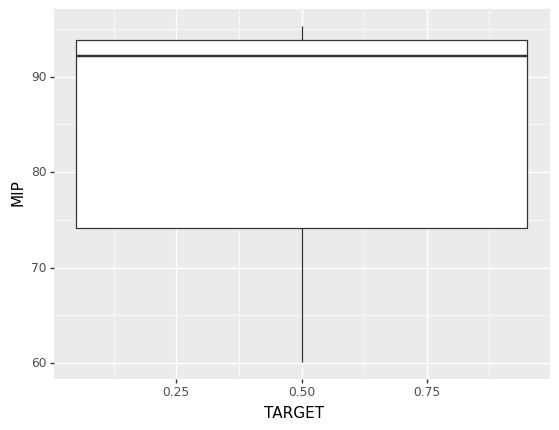

<ggplot: (8767052343925)>

In [ ]:
(ggplot(p_star) + aes(x='TARGET', y=names[0])+ geom_boxplot())

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


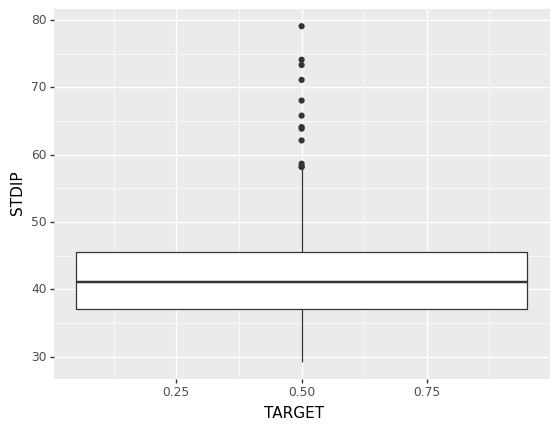

<ggplot: (8767058030957)>

In [ ]:
(ggplot(p_star) + aes(x='TARGET', y=names[1])+ geom_boxplot())

In [ ]:
# Распределение пульсаров и не пульсаров 

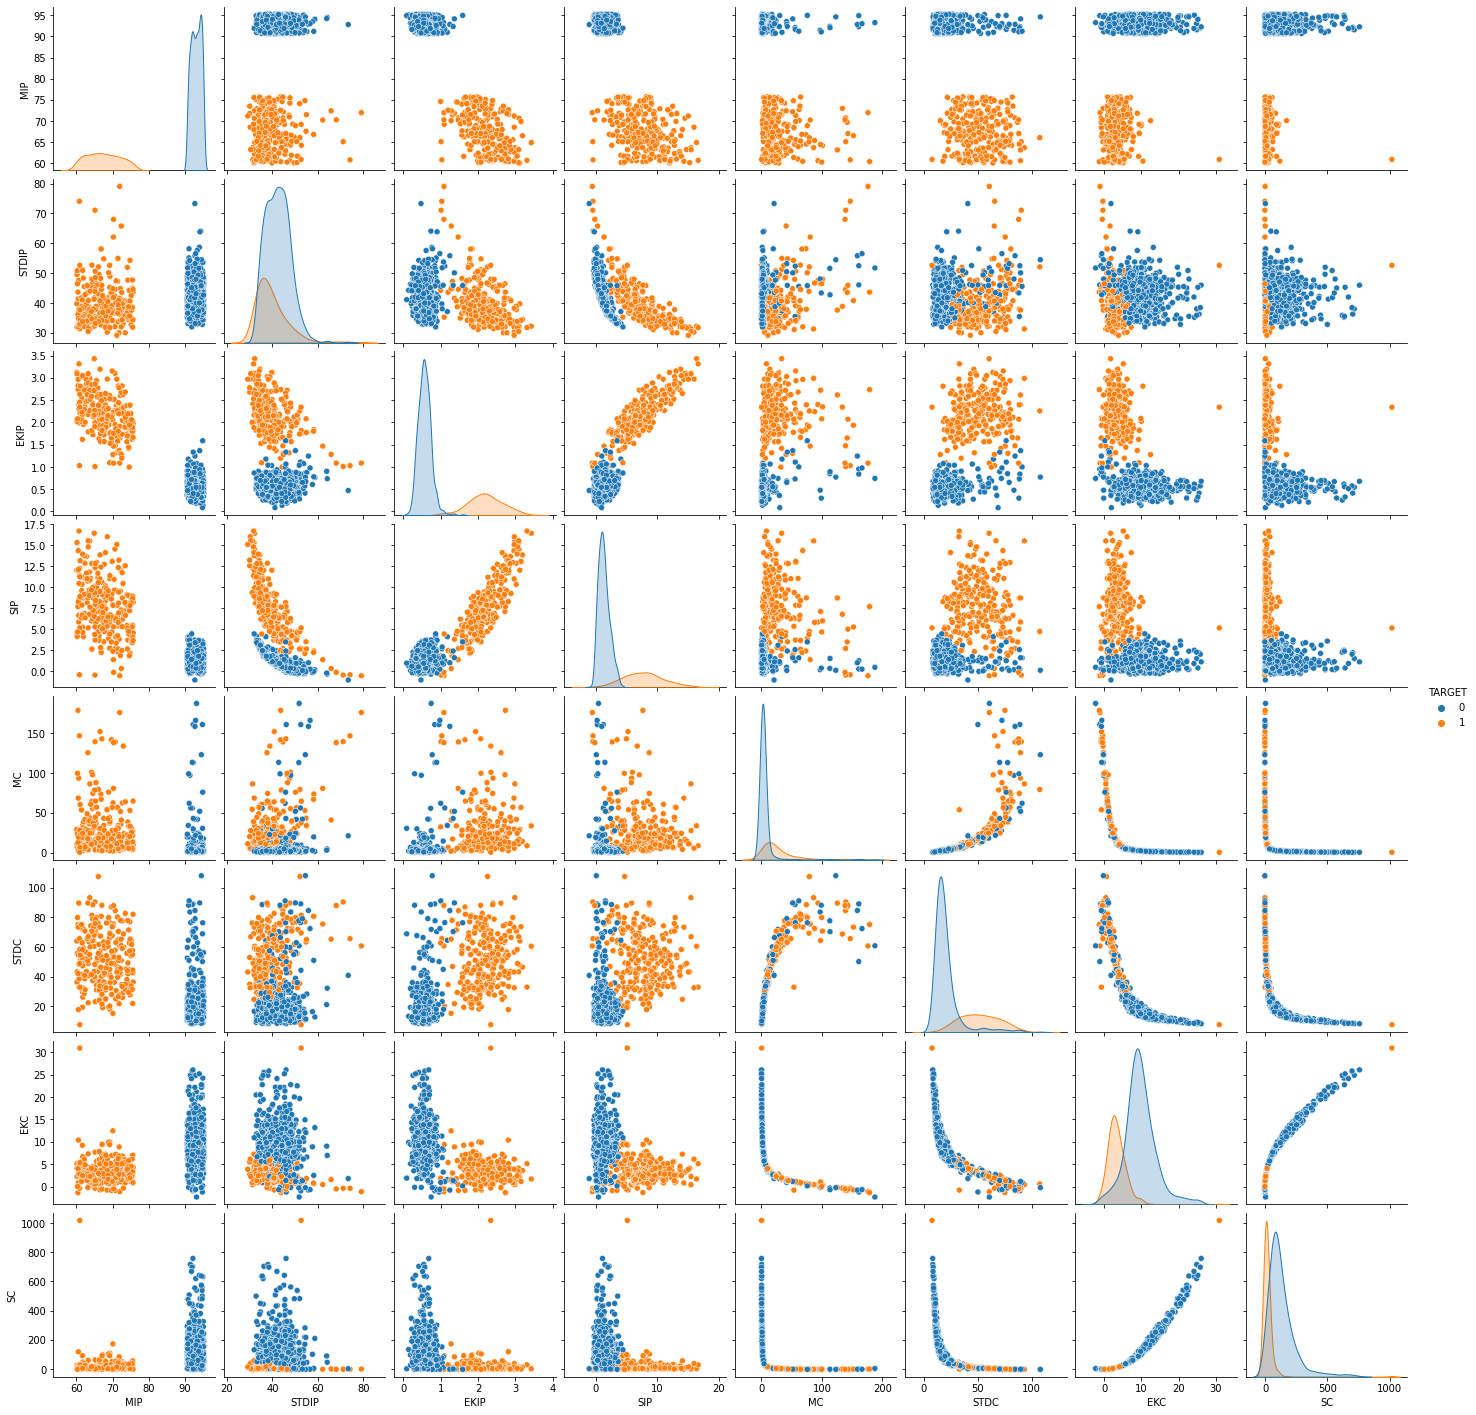

In [ ]:
sns.pairplot(p_star, hue="TARGET")

#Выполним линейную нормировку всех значений предикторов полученной выборки

In [ ]:
#нормировку сделаем в копии 
p_star_norm = p_star.copy()

In [ ]:
x_len = len(p_star_norm['MIP'])
for N in names:
    x = p_star_norm[N]
    p_star_norm[N] = [(x[l] - np.min(x))/(np.max(x) - np.min(x)) for l in range(x_len)]

In [ ]:
#Данные после нормировки
p_star_norm.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
0,0.956946,0.254717,0.085549,0.131560,0.005935,0.052852,0.437735,0.178564,0
1,0.947182,0.214651,0.154531,0.144388,0.011243,0.064693,0.333001,0.107736,0
2,0.215269,0.067976,0.580984,0.515703,0.042194,0.271020,0.213036,0.025381,1
3,0.972925,0.280984,0.128578,0.107362,0.022223,0.154842,0.260758,0.046347,0
4,0.015535,0.368542,0.692620,0.389289,0.498204,0.816478,0.080033,0.000508,1


In [ ]:
#Среднее значение MIP после нормировки
print('Среднее значение MIP после нормировки : ', round(p_star_norm.MIP.mean(),3))

Среднее значение MIP после нормировки :  0.735


In [ ]:
#Среднее по всем столбцам по группировке TARGET после нормировки
p_star_norm.groupby('TARGET').mean()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
TARGET,,,,,,,,
0,0.937618,0.262753,0.142662,0.133139,0.029365,0.127858,0.360944,0.129884
1,0.209111,0.212411,0.631599,0.497141,0.155168,0.441391,0.171850,0.021265


In [ ]:
#Статистика по нормированной базе
p_star_norm.describe()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,0.734992,0.248751,0.278654,0.234382,0.064356,0.215064,0.308350,0.099673,0.278139
std,0.335036,0.123093,0.235288,0.196611,0.135216,0.204786,0.144844,0.113062,0.448325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398524,0.157930,0.122231,0.106888,0.008380,0.071597,0.195909,0.018852,0.000000
50%,0.912783,0.238021,0.164839,0.150190,0.014133,0.119008,0.310638,0.073917,0.000000
75%,0.959443,0.326748,0.462059,0.270257,0.051512,0.309607,0.387389,0.133547,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# У нас есть данные по трем звездам. С помощью логистической регрессии предскажем пульсары это или же нет

In [ ]:
#У нас есть три новые звезда со значениями
p_new = [0.298, 0.509, 0.657, 0.141, 0.318, 0.996, 0.267, 0.452]
p2_new = [0.254, 0.19, 0.939, 0.624, 0.935, 0.875, 0.151, 0.312]
p3_new = [0.485, 0.126, 0.319, 0.294, 0.009, 0.054, 0.371, 0.140]

In [ ]:
#Объединяем звезды в один фрейм
new_stars = {names[l]: [p_new[l],p2_new[l],p3_new[l]] for l in range(8)}

# создаем датафрейм:
df_new_stars = pd.DataFrame(new_stars)
df_new_stars

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
0,0.298,0.509,0.657,0.141,0.318,0.996,0.267,0.452
1,0.254,0.190,0.939,0.624,0.935,0.875,0.151,0.312
2,0.485,0.126,0.319,0.294,0.009,0.054,0.371,0.140


In [ ]:
#Получим расстояния до новых звезд от каждой звезды в базе
distance_star = {'star_1': [np.sqrt(np.sum((p_star_norm[N][l]-df_new_stars[N][0])**2 for N in ['MIP','STDIP','EKIP','SIP','MC','STDC','EKC','SC'])) for l in range(202)],
      'star_2': [np.sqrt(np.sum((p_star_norm[N][l]-df_new_stars[N][1])**2 for N in ['MIP','STDIP','EKIP','SIP','MC','STDC','EKC','SC'])) for l in range(202)],
      'star_3': [np.sqrt(np.sum((p_star_norm[N][l]-df_new_stars[N][2])**2 for N in ['MIP','STDIP','EKIP','SIP','MC','STDC','EKC','SC'])) for l in range(202)]}
df_distance = pd.DataFrame(distance_star)
df_distance.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


,star_1,star_2,star_3
0,1.384322,1.763040,0.571086
1,1.358260,1.706253,0.522981
2,1.064945,1.184984,0.529338
3,1.321931,1.698010,0.603699
4,0.682594,0.707682,1.163060


In [ ]:
#Расстояние от ближайшех звезд до новых
print('star_1: ', df_distance.star_1.min())
print('star_2: ', df_distance.star_2.min())
print('star_3: ', df_distance.star_3.min())

star_1:  0.5877738326745232
star_2:  0.5103473253347952
star_3:  0.23305833596678427


# ***Логистическая регрессия***

Обучение

In [ ]:
#Подключение необходимых библиотек
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Предикторы
X = p_star_norm.iloc[:,:8]

In [ ]:
#Отклики
Y = p_star_norm.iloc[:,8]

In [ ]:
#Обучение 
clf = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, Y)

Предположения по  новым звездам

In [ ]:
#Напомним данные по новым звездам
df_new_stars

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
0,0.298,0.509,0.657,0.141,0.318,0.996,0.267,0.452
1,0.254,0.190,0.939,0.624,0.935,0.875,0.151,0.312
2,0.485,0.126,0.319,0.294,0.009,0.054,0.371,0.140


In [ ]:
 predicted_y = clf.predict(df_new_stars)
 predicted_y

array([1, 1, 0])

Наша модель предсказала, что первые две звезды - пульсары, а третья все таки не пульсар.

In [ ]:
clf.score(df_new_stars, predicted_y)

1.0

In [ ]:
#Вероятности отнесения новых звезд к пульсарам и не пульсарам
clf.predict_proba(df_new_stars)

array([[0.03675209, 0.96324791],
       [0.00263184, 0.99736816],
       [0.5923758 , 0.4076242 ]])

Первые две звезды были уверено отнесены к пульсарам.
А третья звезда не очень уверено к не пульсарам. Всего 59% того, что она не является пульсаром.